In [12]:
import os
import numpy as np
import scipy
import pandas as pd

import lmfit

from scipy.stats import norm, chi2 
from scipy.odr import ODR, Model, RealData

import matplotlib.pyplot as plt

In [80]:
def damped_osc(t, A, omega, gamma, phase, shift):
    omega_damped = np.sqrt(omega**2 - gamma**2)
    return A*np.cos(omega_damped*t+phase)*np.exp(-gamma*t) + shift  

def osc(t, A, omega, phase, shift):
    return A*np.cos(omega*t+phase) + shift

In [20]:
df = pd.read_csv('65_200.csv') 

In [21]:
df.keys()

Index(['Unnamed: 0', '質量 A', 'Unnamed: 2'], dtype='object')

In [66]:
ts = np.array([float(t) for t in df['Unnamed: 0'][1:]])
xs = np.array([float(x) for x in df['質量 A'][1:] ])
xerr = 0.25/2*np.ones(xs.shape[0])

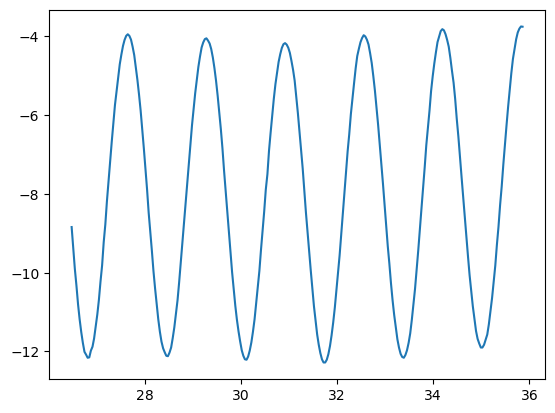

In [67]:
plt.plot(ts,xs)

In [81]:
model = lmfit.Model(osc)

result = model.fit(t=ts, data = xs,  weights=1/xerr, A = 4, omega = np.pi, phase = np.pi, shift = -8)

lmfit.report_fit(result)
#plt.figure()
#result.plot()
#plt.xlabel(r"$g$ (m/s$^2$)")
#plt.ylabel("counts")
#plt.show()

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 282
    # variables        = 4
    chi-square         = 239.607100
    reduced chi-square = 0.86189604
    Akaike info crit   = -37.9396529
    Bayesian info crit = -23.3720246
    R-squared          = 0.99842646
[[Variables]]
    A:      4.08733631 +/- 0.00973569 (0.24%) (init = 4)
    omega:  3.83519426 +/- 8.9412e-04 (0.02%) (init = 3.141593)
    phase: -18.0389946 +/- 0.02796257 (0.16%) (init = 3.141593)
    shift: -7.99543830 +/- 0.00693359 (0.09%) (init = -8)
[[Correlations]] (unreported correlations are < 0.100)
    C(omega, phase) = -0.9963


In [82]:
xs_fit = model.eval(result.params, t=ts)

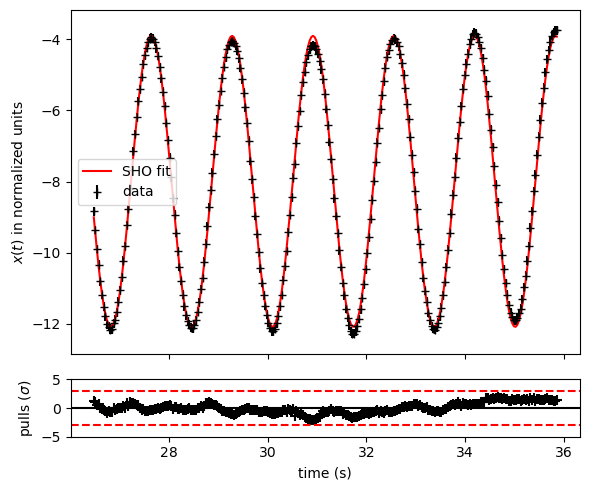

In [83]:

pull = (xs-xs_fit)/(0.25/2)

# --- Create figure with 2 panels ---
fig, (ax_main, ax_pull) = plt.subplots(
    2, 1, sharex=True,
    gridspec_kw={'height_ratios': [6, 1]},
    figsize=(6, 5)
)

# --- Top: data + fit ---
ax_main.errorbar(ts, xs, xerr, fmt='k+', label='data')
ax_main.plot(ts, xs_fit, color='red', label= 'SHO' +' '+'fit')
ax_main.set_ylabel(r"$x(t)$ in normalized units")
ax_main.legend()

# --- Bottom: pulls ---
ax_pull.scatter(ts, pull, color='black', marker="+", s=50)
ax_pull.axhline(0, color='black', linestyle='-')
ax_pull.axhline(3, color='red', linestyle='--')
ax_pull.axhline(-3, color='red', linestyle='--')
ax_pull.set_xlabel(r"time (s)")
ax_pull.set_ylabel(r"pulls ($\sigma$)")
ax_pull.set_ylim(-5,5)

plt.tight_layout()
plt.show()